# Importing the necessary libraries and dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
data=pd.read_csv('D:\Msc Data Science\Projects for resume\linkedin-reviews.csv')
print(data.head())

                                              Review  Rating
0  Does absolutely nothing for a LinkedIn beginne...       1
1                            Force close(galaxy tab)       1
2  Slow and it tries to upload your contacts with...       1
3  Add ability to customize the profile and move ...       4
4  Good app, but it's a pain that it's not possib...       4


The dataset contains two values the review column consists of textual reviews and rating column consists of numerical rating

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  702 non-null    object
 1   Rating  702 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.1+ KB
None


# Exploratory Data Analysis

Analyzing the distribution of ratings.It will provide insight into overall sentiment of the reviews

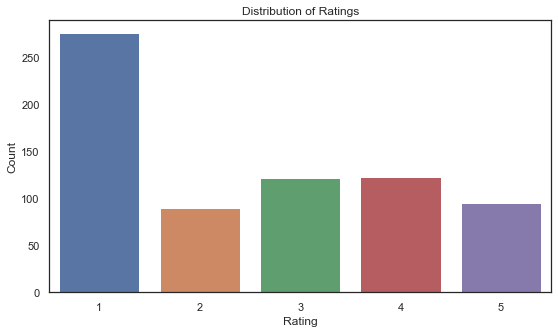

In [4]:
sns.set(style='white')
plt.figure(figsize=(9,5))
sns.countplot(data=data,x='Rating')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

It gives a clear picture of how many reviews fall into each rating category (from 1 to 5)

Analyze the lenght of reviews as this can sometimes correlate with sentiment or detail of feedback

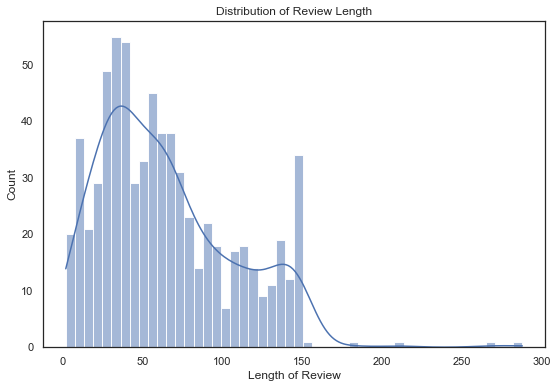

In [5]:
# Calculating the length of each review
data['Review Length']=data['Review'].apply(len)

#Plotting the distribution of reviiew length
plt.figure(figsize=(9,6))
sns.histplot(data['Review Length'],bins=50,kde=True)
plt.title('Distribution of Review Length')
plt.xlabel('Length of Review')
plt.ylabel('Count')
plt.show()

# Adding Sentiments labels in the Data

Next step is to label the data with sentiments.
* TextBlob provides a polarity score ranging from -1 (very negative) to 1(very positive) for a given text.
* We can use this score to classify each review's sentiment as positive,negavtive or Neutral
* Install it by executing the pip command !pip install prompt

In [6]:
#Using textblob for sentiment analysis
from textblob import TextBlob

def textblob_sentiment_analysis(review):
    #Analyzing the sentiment of the reviews
    sentiment = TextBlob(review).sentiment
    #Classifying based on polarity
    if sentiment.polarity > 0.1:
        return 'Positive'
    elif sentiment.polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

    
data['Sentiment']=data['Review'].apply(textblob_sentiment_analysis)

print(data.head())
    

                                              Review  Rating  Review Length  \
0  Does absolutely nothing for a LinkedIn beginne...       1             80   
1                            Force close(galaxy tab)       1             23   
2  Slow and it tries to upload your contacts with...       1             61   
3  Add ability to customize the profile and move ...       4             90   
4  Good app, but it's a pain that it's not possib...       4            133   

  Sentiment  
0  Negative  
1   Neutral  
2  Negative  
3   Neutral  
4  Positive  


The dataset now includes sentiment labels for each review classified as Positive, Negative or Neutral based on the polarity score calculated by TextBlob

# Analyzing App Reviews Sentiments

Lets perform reviews sentiment analysis, begin by analyzing the distribution of sentiments across the dataset.

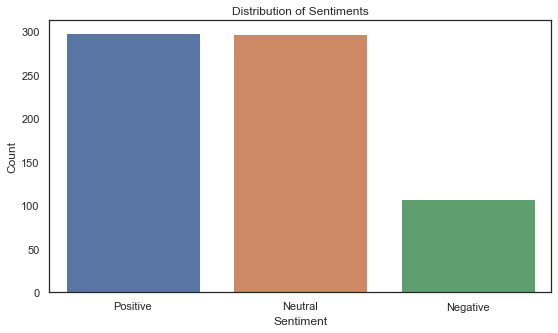

In [7]:
#Analyzing the distribution of sentiments
sentiment_distribution=data['Sentiment'].value_counts()

#Plotting the distribution of sentiments
plt.figure(figsize=(9,5))
sns.barplot(x=sentiment_distribution.index,y=sentiment_distribution.values)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

We can see although the app has low ratings still the reviewers don't use many negative words in the reviews for the app.

Now lets explore the relationship between the sentiments and the ratings. This analysis can help us understand whether there is a correlation between the sentiments of the text and numerical rating

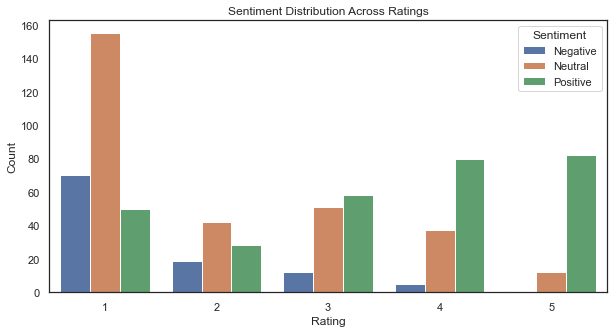

In [8]:
plt.figure(figsize=(10,5))
sns.countplot(data=data,x='Rating',hue='Sentiment')
plt.title('Sentiment Distribution Across Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

Now let's perform a text analysis to identify common words or themes within each sentiment category. It involves examining the most frequntly occuring words in positive, negative and neutral reviews using WORDCLOUD

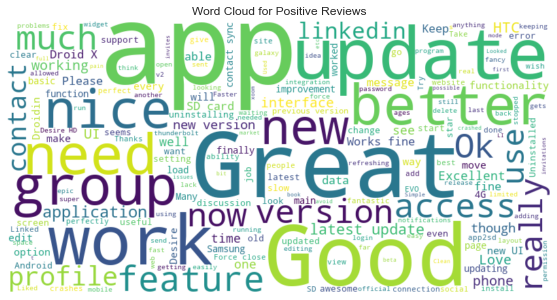

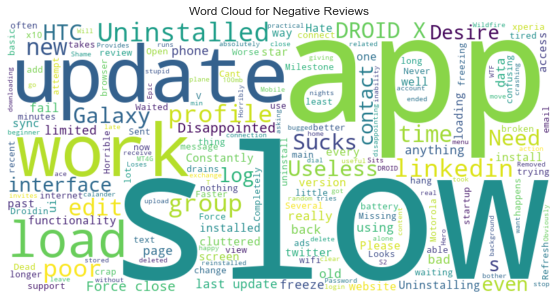

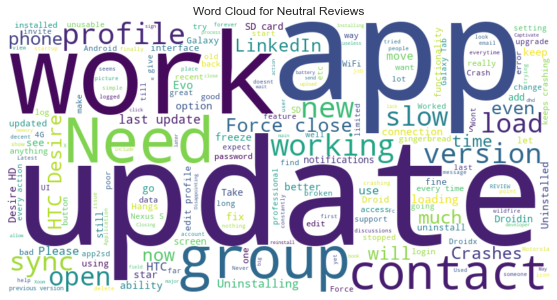

In [9]:
from wordcloud import WordCloud

# Function to generate word cloud for each sentiment
def generate_word_cloud(sentiment):
    text = ' '.join(review for review in data[data['Sentiment'] == sentiment]['Review'])
    wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment} Reviews')
    plt.axis('off')
    plt.show()

# Generating word clouds for each sentiment
for sentiment in ['Positive', 'Negative', 'Neutral']:
    generate_word_cloud(sentiment)

Analysis

* Despite some low ratings, many reviews are neutral or positive, indicating users have mixed feelings about the app.
* Word cloud analysis reveals specific areas where users are satisfied or dissatisfied, guiding developers on what to improve or maintain.

